In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.cifar10.load_data()

In [34]:
x_train.shape

(50000, 32, 32, 3)

In [35]:
x_train = x_train.reshape(-1,32, 32, 3)/255
x_test = x_test.reshape(-1, 32, 32, 3)/255

In [36]:
x_train.shape

(50000, 32, 32, 3)

In [37]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [38]:
def bulid_cnn_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
  ])
  return model

In [40]:
cnn_model = bulid_cnn_model()
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=cnn_model.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4473 - accuracy: 0.4763 - val_loss: 1.2089 - val_accuracy: 0.5690
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0719 - accuracy: 0.6218 - val_loss: 1.0170 - val_accuracy: 0.6416
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9091 - accuracy: 0.6821 - val_loss: 0.9275 - val_accuracy: 0.6744
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7970 - accuracy: 0.7192 - val_loss: 0.8807 - val_accuracy: 0.6990
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7057 - accuracy: 0.7529 - val_loss: 0.8406 - val_accuracy: 0.7178
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6325 - accuracy: 0.7763 - val_loss: 0.8669 - val_accuracy: 0.7102
Epoch 7/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.5640 - accuracy: 0.8015 - val_loss: 0.8499 - val_ac

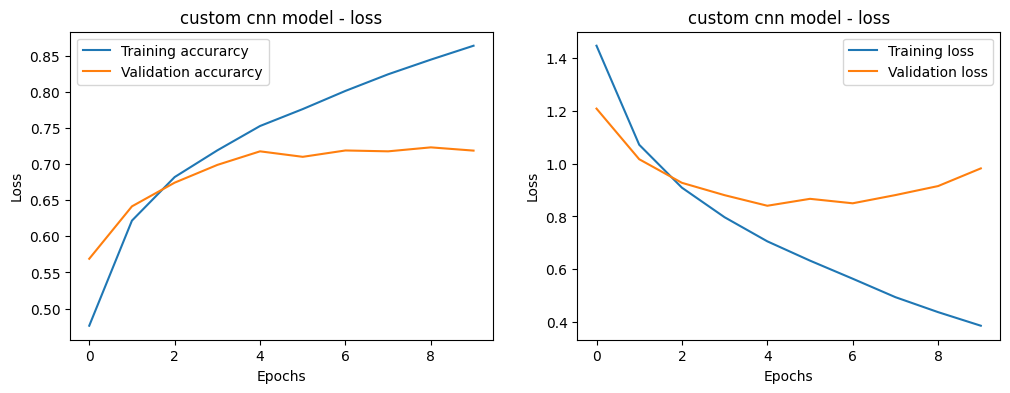

In [41]:
def plot_training_data(history,title):
  plt.figure(figsize=(12, 4))
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'], label='Training accurarcy')
  plt.plot(history.history['val_accuracy'], label='Validation accurarcy')
  plt.title(f'{title} - loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(history.history['loss'], label='Training loss')
  plt.plot(history.history['val_loss'], label='Validation loss')
  plt.title(f'{title} - loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

plot_training_data(history, "custom cnn model")

In [42]:
y_pred = cnn_model.predict(x_test)
y_pred_max = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 3ms/step


In [43]:
y_pred

array([[7.1807986e-04, 6.5423422e-03, 1.5319488e-03, ..., 2.6084714e-05,
        1.9604550e-03, 4.0023171e-04],
       [2.7943994e-05, 3.4208637e-02, 2.6350213e-08, ..., 2.7132432e-11,
        9.6568698e-01, 7.6450357e-05],
       [7.9145201e-02, 1.1177379e-01, 2.1061327e-03, ..., 2.1573647e-03,
        6.0774630e-01, 1.9262296e-01],
       ...,
       [1.1519654e-10, 6.6786802e-12, 2.0700826e-01, ..., 1.9745396e-03,
        2.3043329e-09, 1.1541036e-09],
       [2.1764914e-02, 7.5766307e-01, 5.7677878e-04, ..., 1.9646334e-03,
        5.2137689e-06, 1.8584675e-05],
       [5.3422962e-13, 3.8874039e-15, 2.0862985e-10, ..., 9.9999923e-01,
        1.6527265e-13, 5.1564828e-14]], dtype=float32)

In [44]:
y_pred_max

array([3, 8, 8, ..., 5, 1, 7])

In [45]:
cm = confusion_matrix(y_test, y_pred_max)
cm

array([[716,  16,  70,  20,  32,  14,  17,  13,  55,  47],
       [ 14, 748,   6,  13,   5,   3,  23,   9,  21, 158],
       [ 50,   2, 557,  54, 129,  60,  71,  51,  16,  10],
       [ 15,   4,  53, 504, 110, 175,  60,  47,   9,  23],
       [ 13,   4,  43,  48, 740,  29,  27,  83,  10,   3],
       [ 10,   3,  25, 150,  79, 619,  37,  57,  10,  10],
       [  6,   1,  26,  40,  52,  23, 828,  10,   4,  10],
       [  6,   2,  25,  29,  62,  61,   3, 798,   3,  11],
       [ 46,  24,  14,  14,  17,  10,   2,   6, 819,  48],
       [ 17,  37,   8,  13,   7,  11,   9,  17,  22, 859]])

In [46]:
print(classification_report(y_test, y_pred_max, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.80      0.72      0.76      1000
  automobile       0.89      0.75      0.81      1000
        bird       0.67      0.56      0.61      1000
         cat       0.57      0.50      0.53      1000
        deer       0.60      0.74      0.66      1000
         dog       0.62      0.62      0.62      1000
        frog       0.77      0.83      0.80      1000
       horse       0.73      0.80      0.76      1000
        ship       0.85      0.82      0.83      1000
       truck       0.73      0.86      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



In [49]:
cnn_model.save('project.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
from PIL import Image

In [54]:
def pre_process_image(image_path):
  img = Image.open(image_path)
  img = img.resize((32, 32))
  img_array = np.array(img).astype('float32')/255
  img_array = img_array.reshape(1,32,32,3)
  return img_array

In [55]:
def predict_image(model,image_path):
  prediction = model.predict(image_path)
  class_index = np.argmax(prediction)
  class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  predicted_class = class_names[class_index]
  confidence = prediction[0][class_index]
  return predicted_class, confidence

In [70]:
test_image =pre_process_image('/content/airplane.jpg')

In [71]:
predicted_class, confidence = predict_image(cnn_model,test_image)

1/1 [==============================] - 0s 26ms/step


In [72]:
predicted_class

'airplane'

In [73]:
confidence

0.9887754